In [43]:
# import the necessary modules here
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as skmet

#read data file
data=pd.read_csv('data.csv',header=None).values
print(data.shape)

print(np.corrcoef(data.T))


(50, 2)
[[1.        0.7355261]
 [0.7355261 1.       ]]


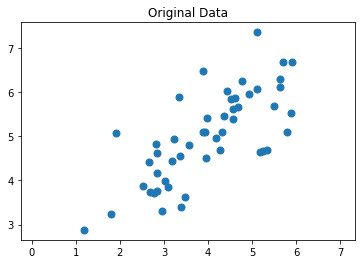

In [2]:
plt.plot(data[:,0],data[:,1], '.', markersize=14)
plt.axis('equal');
plt.title('Original Data')
plt.show()

In [47]:
mu = data.mean(axis=0) # mean of each col
sigma = data.std(axis=0)  # std dev of each col

print(mu)
print(sigma)

Xnorm = (data - mu)/sigma
print (Xnorm[0:5,:])

[3.989264 5.002806]
[1.16126805 1.01312579]
[[-0.52327626 -1.59279926]
 [ 0.46383434  0.84036357]
 [-1.14836881 -0.58315168]
 [-1.05407533 -1.27072671]
 [-0.98397954 -0.81658765]]


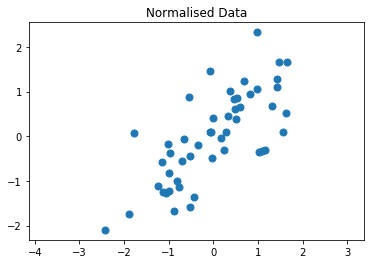

In [48]:
plt.plot(Xnorm[:,0],Xnorm[:,1], '.', markersize=14)
plt.axis('equal');
plt.title('Normalised Data')
plt.show()

In [49]:
# Covariance matrix of normalized data
m = len(Xnorm)
covmat = np.dot(Xnorm.T, Xnorm)/m 
print(covmat)

#covmat2=np.corrcoef(Xnorm.T)
#print(covmat2)


[[1.        0.7355261]
 [0.7355261 1.       ]]


In [55]:
#link to 4.9 PCA via Egen Value Decomposition

S,U = np.linalg.eig(covmat)

print('Eigen values: {}'.format(S))
print('Eigen vectors:')
print(U)

#check properties
# determinant of U =1 (unit matrix)
print(np.linalg.det(U))
print()

# transpose(U)=inverse (U)
print(U.T)
print()
print(np.linalg.inv(U))
print()

#vectors are orthogonal (uncorrelated)
print(np.dot(U[:,0],U[:,1]))


Eigen values: [1.7355261 0.2644739]
Eigen vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
1.0
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
0.0
[1.7355261 0.2644739]


In [6]:
# Z contains uncorrelated data  
Z = np.dot(Xnorm,U)

[[1.00000000e+00 5.48409504e-16]
 [5.48409504e-16 1.00000000e+00]]


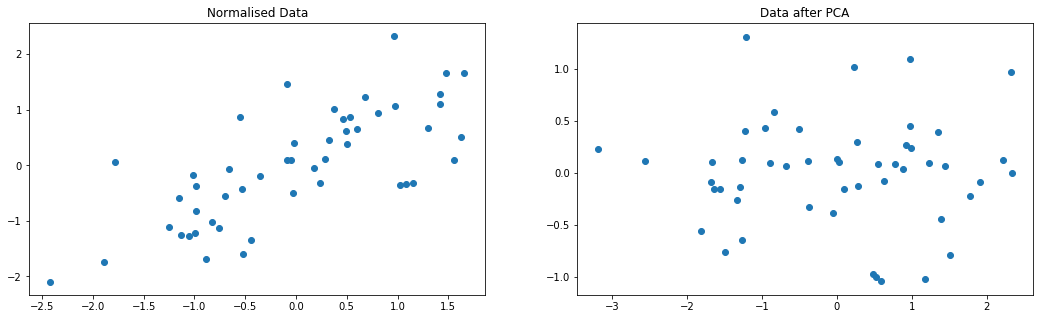

In [54]:
# 2 plots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for original data 
#axs[0].scatter(data[:,0], data[:,1])
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
#axs[0].set_title("Original Data")
axs[0].set_title("Normalised Data")


# plot for uncorrelated data after PCA
axs[1].scatter(Z[:,0], Z[:,1])
axs[1].set_title("Data after PCA")

print(np.corrcoef(Z.T))

In [30]:
k = 1 # number of principal components to retain

Ured =  U[:,0:k] # choose the first k principal components

#project our data Xnorm onto Ured
Zred = np.dot(Xnorm,Ured) 
varExplained=S/np.sum(S)*100
varExplained=np.round(varExplained,2)
print(varExplained)

print(Zred.shape)
print(Ured.shape)


[86.78 13.22]
(50, 1)
(2, 1)


(50, 2)


Text(0.5, 1.0, 'Recovered data after dimensionality reduction')

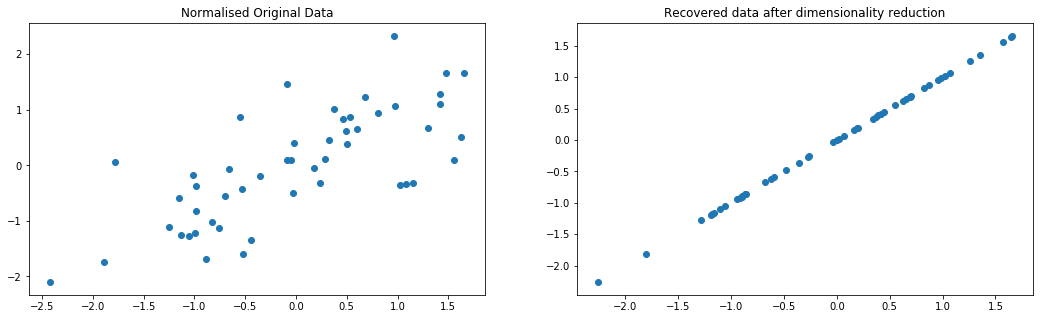

In [9]:
#recover our Xnorm data from Zred
Xrec = np.dot(Zred, Ured.T)
print(Xrec.shape)


#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for Xnorm 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Normalised Original Data")


# plot for Xrec
axs[1].scatter(Xrec[:,0], Xrec[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")

In [56]:
rec_err = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print("The reconstruction error is: {}".format(rec_err))


The reconstruction error is: 0.3636439898404388


(50, 2)
**************************************************
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
**************************************************
[86.78 13.22]
**************************************************
[ 86.78 100.  ]


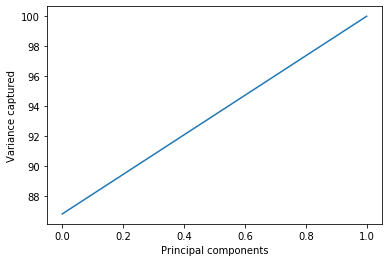

**************************************************
(50, 1)
**************************************************
(50, 2)
**************************************************


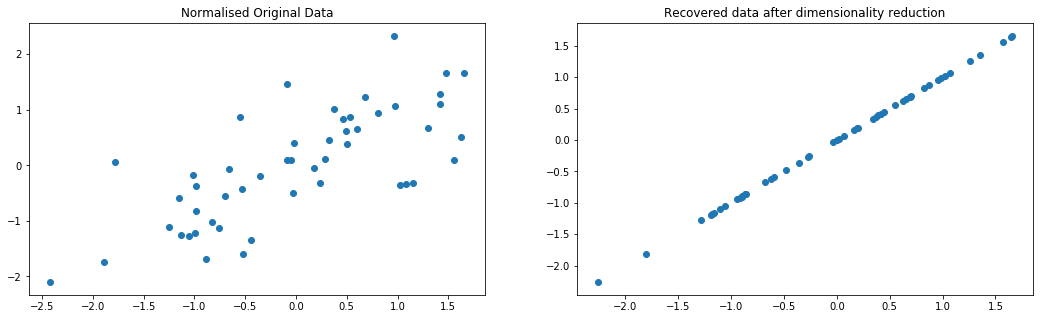

**************************************************
The reconstruction error is: 0.3636439898404388


In [33]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Read the data
data = pd.read_csv('data.csv', header=None).values
print(data.shape)

print('*'*50)

#normalize our data
Xnorm = scale(data)

#perform PCA using sklearn PCA implementation
pca = PCA(n_components=2)
pca.fit(Xnorm)
print(pca)

print('*'*50)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(np.round(var*100,2))

print('*'*50)

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.show()

print('*'*50)

pca = PCA(n_components=1)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)

print('*'*50)

# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)

print('*'*50)

#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for Xnorm 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Normalised Original Data")


# plot for Xrec
axs[1].scatter(Xrec[:,0], Xrec[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")
plt.show()

print('*'*50)

# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(f'The reconstruction error is: {rec_error}')

(200, 5)
**************************************************
**************************************************
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
**************************************************
[0.83743065 0.09909097 0.0345153  0.01793089 0.01103218]
**************************************************
[83.74 93.65 97.1  98.89 99.99]
**************************************************
(200, 2)
**************************************************
(200, 5)
**************************************************
0.25194914484908526


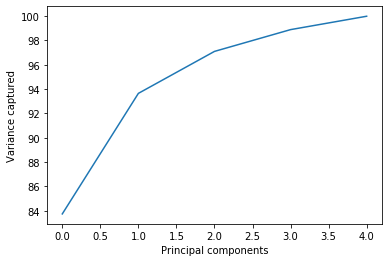

In [21]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Read the data
data = pd.read_csv('dataset5DGaussian.csv', header=None).values
print(data.shape)

print('*'*50)

#normalize our data
Xnorm = scale(data)

#perform PCA using sklearn PCA implementation
pca = PCA(n_components=5)
pca.fit(Xnorm)
print(pca)

print('*'*50)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

print('*'*50)

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

print('*'*50)

pca = PCA(n_components=2)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)

print('*'*50)

# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)

print('*'*50)

# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(rec_error)